In [443]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merge = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [444]:
# Checking the number of mice. Need length of unique mouse ID's to ensure no duplicates
mice_count = len(mouse_study_merge["Mouse ID"].unique())
mice_count

249

In [445]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Used duplicated() function found online to find which mouse name/timepoints repeat.
duplicate = mouse_study_merge[mouse_study_merge.duplicated(["Mouse ID","Timepoint"], keep = False)]

# Displays rows where Mouse ID AND Timepoint are duplicates
duplicate.values


array([['g989', 0, 45.0, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 0, 45.0, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 5, 48.78680146, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 5, 47.57039208, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 10, 51.74515613, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 10, 49.8805278, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 15, 51.32585207, 1, 'Propriva', 'Female', 21, 26],
       ['g989', 15, 53.44201976, 0, 'Propriva', 'Female', 21, 26],
       ['g989', 20, 55.32612202, 1, 'Propriva', 'Female', 21, 26],
       ['g989', 20, 54.65765008, 1, 'Propriva', 'Female', 21, 26]],
      dtype=object)

In [446]:
# Optional: Get all the data for the duplicate mouse ID. Want all g989 data.

# Set index as Mouse ID
mouse_g989 = mouse_study_merge.set_index("Mouse ID")

# Use loc to locate rows of desired Mouse ID
mouse_g989 = mouse_g989.loc["g989",:]
# Reset index
mouse_g989 = mouse_g989.reset_index()

mouse_g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,g989,0,45.000000,0,Propriva,Female,21,26
2,g989,5,48.786801,0,Propriva,Female,21,26
3,g989,5,47.570392,0,Propriva,Female,21,26
4,g989,10,51.745156,0,Propriva,Female,21,26
5,g989,10,49.880528,0,Propriva,Female,21,26
6,g989,15,51.325852,1,Propriva,Female,21,26
7,g989,15,53.442020,0,Propriva,Female,21,26
8,g989,20,55.326122,1,Propriva,Female,21,26
9,g989,20,54.657650,1,Propriva,Female,21,26


In [447]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Set index to Mouse ID to then do loc method to remove duplicate
mouse_study_merge2 = mouse_study_merge.set_index("Mouse ID")
# We know from previous part mouse g989 is duplicate, so we must drop that Mouse ID
mouse_study_merge2 = mouse_study_merge2.drop("g989")

# Reset index
mouse_study_merge2 = mouse_study_merge2.reset_index()

mouse_study_merge2.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [448]:
# Checking the number of mice in the clean DataFrame. Check unique Mice ID's
len(mouse_study_merge2["Mouse ID"].unique())

248

In [449]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Set index to Drug Regimen
mouse_stats = mouse_study_merge2.set_index("Drug Regimen").sort_values("Drug Regimen")

# Convert Tumor Volume column to float
mouse_stats["Tumor Volume (mm3)"] = mouse_stats["Tumor Volume (mm3)"].astype(float)

# Group by Drug Regimen and make new columns
mouse_mean = mouse_stats.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mouse_median = mouse_stats.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
mouse_var = mouse_stats.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
mouse_stdev = mouse_stats.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
mouse_sterr = mouse_stats.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Merge data at each step to make 1 big DataFrame at the end
mean_med = pd.merge(mouse_mean, mouse_median, on = "Drug Regimen", how = "left")
var_stdev = pd.merge(mouse_var, mouse_stdev, on = "Drug Regimen", how = "left")
merge_test = pd.merge(mean_med, var_stdev, on = "Drug Regimen", how = "left")

# Final Merge
table_summary = pd.merge(merge_test,mouse_sterr, on = "Drug Regimen", how = "left")


# Define columns in table and rename them apropriately

table_summary = table_summary.rename(columns = {"Tumor Volume (mm3)_x_x": "Mean Tumor Volume",
                                      "Tumor Volume (mm3)_y_x": "Median Tumor Volume",
                                      "Tumor Volume (mm3)_x_y": "Tumor Volume Variance",
                                      "Tumor Volume (mm3)_y_y": "Tumor Volume Std. Dev.",
                                      "Tumor Volume (mm3)": "Tumor Volume Std. Err."})
table_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [450]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_stats = mouse_stats.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
mouse_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0, 0.5, '# of Observed Mouse Timepoints')

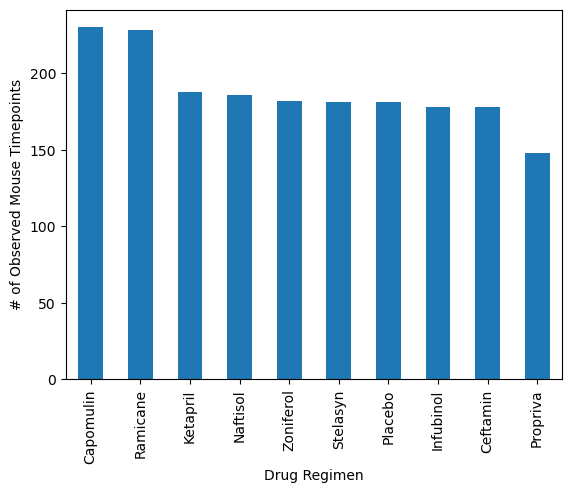

In [451]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_study_merge2["Drug Regimen"] = mouse_study_merge2["Drug Regimen"].sort_values(ascending = False)
mouse_study_merge2["Drug Regimen"].value_counts().plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

<BarContainer object of 10 artists>

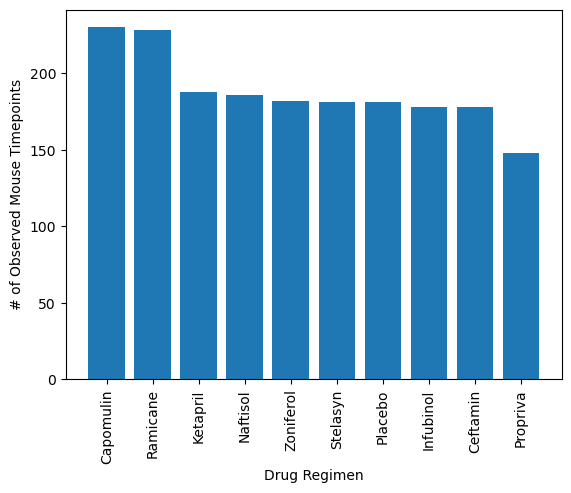

In [452]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


mouse_regimen_count = mouse_study_merge2["Drug Regimen"].value_counts()

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)

plt.bar(mouse_regimen_count.index.values,mouse_regimen_count.values)

Text(0, 0.5, 'Sex')

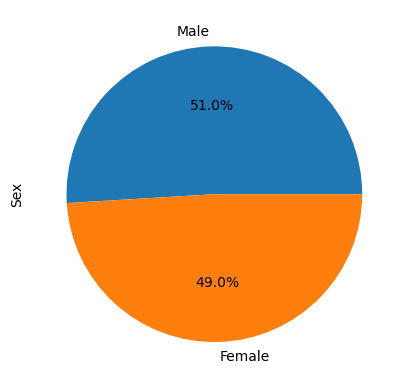

In [453]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_merge2["Sex"] = mouse_study_merge2["Sex"].sort_values(ascending = False)
mouse_study_merge2["Sex"].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

plt.ylabel("Sex")



([<matplotlib.patches.Wedge at 0x7fa4cbeaa350>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

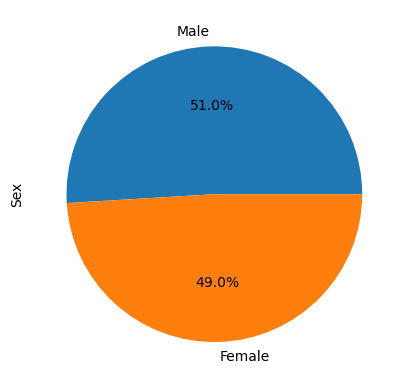

In [454]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_regimen_sex = mouse_study_merge2["Sex"].value_counts()

plt.ylabel("Sex")

plt.pie(mouse_regimen_sex, labels = mouse_regimen_sex.index.values, autopct = "%0.1f%%")

In [455]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_tumor_volume = mouse_study_merge2[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

# We only want last timepoint for each mouse so drop duplicate mouse values
mouse_tumor_volume = mouse_tumor_volume.drop_duplicates("Mouse ID",keep = "last")


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


merged_df = pd.merge(mouse_study_merge2,mouse_tumor_volume, on = "Mouse ID", how = "left").drop_duplicates("Mouse ID",keep = "last").reset_index().drop(columns = "index")

merged_df = merged_df.rename(columns = {"Timepoint_x":"Timepoint","Timepoint_y":"Final Mouse Timepoint",
                                        "Tumor Volume (mm3)_x":"Tumor Volume (mm3)",
                                        "Tumor Volume (mm3)_y":"Final Mouse Tumor Volume (mm3)",
}).drop(columns = ["Timepoint","Tumor Volume (mm3)"])

merged_df = merged_df

merged_df

,Mouse ID,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Mouse Timepoint,Final Mouse Tumor Volume (mm3)
0,f932,0,Ketapril,Male,15,29,0,45.000000
1,x336,0,Naftisol,Female,4,29,0,45.000000
2,h428,0,Ketapril,Female,1,27,0,45.000000
3,v199,0,Naftisol,Female,17,29,0,45.000000
4,o848,0,Stelasyn,Female,14,27,0,45.000000
...,...,...,...,...,...,...,...,...
243,r944,2,Capomulin,Male,12,25,45,41.581521
244,u364,3,Capomulin,Male,18,17,45,31.023923
245,p438,1,Ceftamin,Female,11,26,45,61.433892
246,x773,4,Placebo,Female,21,30,45,58.634971


In [456]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate Final Tumor Volume for each drug type
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Final Mouse Tumor Volume (mm3)"]
    # Append to empty list
    tumor_vol.append(final_tumor_vol)
    # Create quartiles
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    low_outlier = lowerq - (1.5*iqr)
    up_outlier = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < low_outlier) | (final_tumor_vol > up_outlier)]
    # Print outliers for each drug
    print(drug,"Potential Outliers: ", outliers)



Capomulin Potential Outliers:  Series([], Name: Final Mouse Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers:  Series([], Name: Final Mouse Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers:  20    36.321346
Name: Final Mouse Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers:  Series([], Name: Final Mouse Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

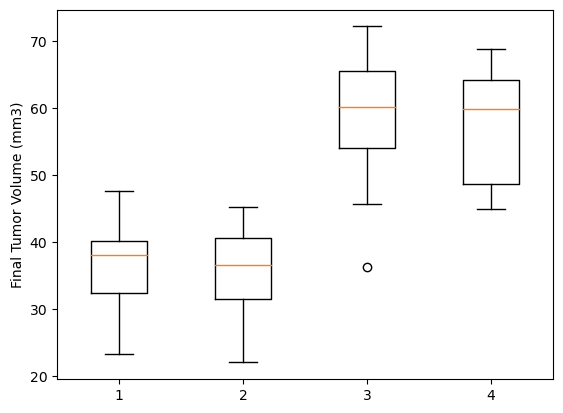

In [457]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol)
plt.ylabel("Final Tumor Volume (mm3)")


Text(0.5, 1.0, 'Capomulin Treatment of mouse l509')

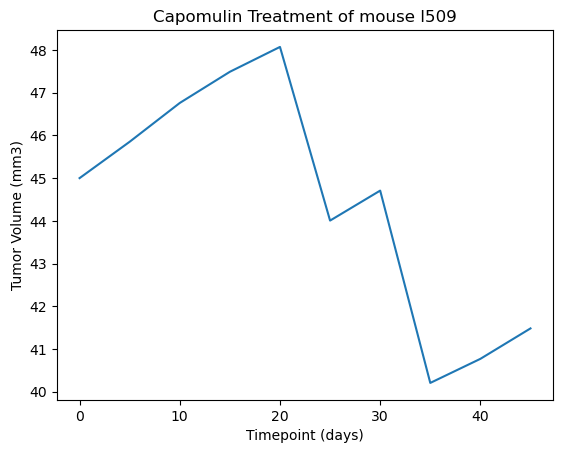

In [458]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Create new blank list to store mouse IDs
tumor_vol2 = []

for drug in treatments:
    if drug == "Capomulin":
        # See where treatment is Capomulin and return mouse IDs associated with them
        final_tumor_vol2 = merged_df.loc[merged_df["Drug Regimen"] == drug, "Mouse ID"]
        # Append to empty list
        tumor_vol2.append(final_tumor_vol2)

mouse_rand = tumor_vol2

# Mice treated with Capomulin, pick one from list below
mouse_rand

mouse_study_merge3 = mouse_study_merge2.set_index("Mouse ID")

# Plot timepoints vs tumor volume of desired mouse
plt.plot(mouse_study_merge3.loc["l509","Timepoint"],mouse_study_merge3.loc["l509", "Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")